In [1]:
# Проверка использования GPU
import tensorflow as tf
print(tf.test.gpu_device_name())
print(tf.test.is_built_with_cuda())

/device:GPU:0
True


In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data))
print(len(test_data))

8982
2246


C:\Users\Tuck\anaconda3\envs\ML-GPU\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Tuck\anaconda3\envs\ML-GPU\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
# Декодирование новостей в текст
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i-3, '?') for i  in train_data[0]])
print(decoded_newswire)

???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3


In [3]:
# Подготовка данных
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results=np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [4]:
# Второй способ векторизации to_categorical MNIST
def to_one_hot(labels, dimensions=46):
    results=np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label]=1
    return results
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [5]:
# Конструирование нейронной сети
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# Компиляция модели
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
# Создание проверочного набора
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]
# Обучение модели
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 25ms/step - loss: 2.6832 - accuracy: 0.5314 - val_loss: 1.7900 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4440 - accuracy: 0.7035 - val_loss: 1.3197 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0759 - accuracy: 0.7627 - val_loss: 1.1488 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8529 - accuracy: 0.8161 - val_loss: 1.0511 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6859 - accuracy: 0.8514 - val_loss: 0.9808 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5483 - accuracy: 0.8816 - val_loss: 0.9624 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4425 - accuracy: 0.9058 - val_loss: 0.9062 - val_accuracy: 0.8090
Epoch 8/20
16

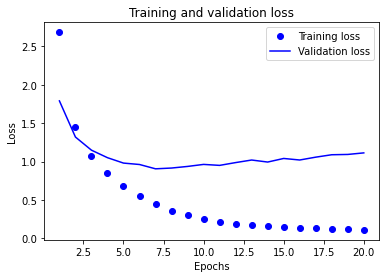

In [7]:
# График потерь
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

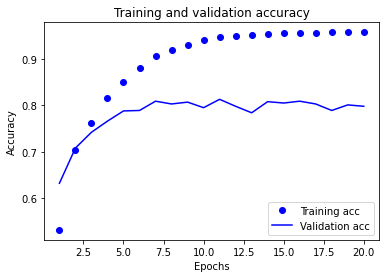

In [8]:
# График точности
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# Компиляция модели
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
# Обучение модели
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=9,
                  batch_size=512,
                  validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 21ms/step - loss: 2.6163 - accuracy: 0.5387 - val_loss: 1.7562 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 1.4222 - accuracy: 0.7035 - val_loss: 1.3009 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.0501 - accuracy: 0.7747 - val_loss: 1.1321 - val_accuracy: 0.7420
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.8176 - accuracy: 0.8244 - val_loss: 1.0269 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.6505 - accuracy: 0.8629 - val_loss: 0.9823 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5201 - accuracy: 0.8943 - val_loss: 0.9246 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4158 - accuracy: 0.9153 - val_loss: 0.9125 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [30]:
print(results)

[0.9508577585220337, 0.7943009734153748]


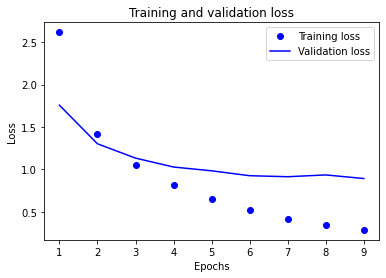

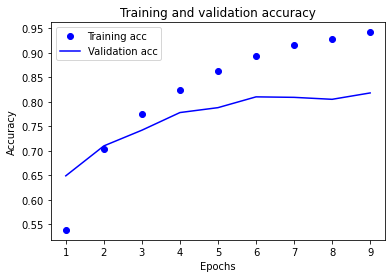

In [31]:
# График потерь
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# График точности
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Точность случайного классификатора
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.19056099732858414

In [12]:
# Предсказание на новых данных
predictions=model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.99999994
3
